MASSIVE DATA MINING AND STREAMING

# BACKGROUND:
In this current era of information explosion, textual data has become an indispensable part of
our daily lives. It is generated in massive volumes every second, from social media posts,
customer reviews, movie reviews, feedback, complaints and more. Analyzing this vast amount
of textual data is crucial in understanding this data and making use of it in business.

# Introduction

## Problem Background

Online reviews significantly influence consumer purchasing decisions, particularly in the food industry. Fine Food focuses on the key industry areas of bakery, confectionery, dairy, meat & seafood, and natural products.

Analyzing sentiments in these reviews helps businesses understand customer satisfaction, improve product offerings, and enhance customer experience.

\
\
High Review Volume: The Amazon Fine Food reviews dataset contains a large number of reviews, providing a robust sample for analysis.

Diverse Opinions: Reviews cover a wide range of products, reflecting diverse consumer opinions and sentiments.

Business Impact: Fine foods are a critical category where customer feedback directly impacts product development and marketing strategies.

Relevance: Sentiment analysis in the food sector helps identify trends, preferences, and areas needing improvement, directly benefiting producers and consumers.



## About Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review.

1. Reviews from Oct 1999 - Oct 2012
2. 568,454 reviews
3. 256,059 users
4. 74,258 products
5. 260 users with > 50 reviews

##  Objective

To achieve the aim in this project, several objectives have been issued which are:
1. To conduct data and text preprocessing on Amazon Fine Food Review.
2. To perform model development on predicting and clustering customer segments.
3. To evaluate model performance on clustering algorithms in different clustering.
4. To conduct customer feedback analysis on consumer’s review toward Amazon Fine Food by identified clusters.


## Flow of Executive

1. Data and Libarary Import
2. Data Preprocessing
  - Data Type Conversion
  - Data cleaning
3. Feature Engineering
  - Data binning
  - Timestamp extraction
4. Text Preprocessing
  - Letter Case Standardization
  - Punctuation Removal
  - Whitespace Removal
  - Digit Number Removal
  - Tokenization
  - Word Lemmatizing
  - Stopword Removal
  - Removal of Unicode / Bicode Characters
  - Rejoin
5. EDA
6. Data Size Reduction & Data Resampling
7. TF-IDF
8. PCA
9. Model Development
10. Cluster Analysis
10. Model Evaluation
11. Conclusion

# Import Libraries

In [ ]:
# Run this for dataset if in google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# libraries for data wrangling and data manipulation
import pandas as pd
import numpy as np
import datetime
import re

# libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# libraries for Model Development and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import Parallel, delayed
from sklearn.utils import parallel_backend
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from joblib import parallel_backend
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Word Embedding
from gensim.models import Word2Vec
import gensim
import os
import time
from datetime import datetime

# Warning
import warnings
#ignore warning
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from operator import itemgetter
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.utils import gen_batches
from joblib import Parallel, delayed
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score,adjusted_mutual_info_score,completeness_score,v_measure_score,silhouette_score
from sklearn.metrics import calinski_harabasz_score
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.sparse import csr_matrix
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In Python, we can use the nltk library for doing basic text pre-proccessing.
To get start with, install the nltk library in Python using following command

In [ ]:
!pip install nltk

Import the word_tokenize, stopword library, word lemmatization and word stemming function within nltk library.

In [ ]:
# String library with built-in punctuation records
import string

# nltk library for text preprocessing purpose
import nltk
nltk.download('punkt')

# Library for work tokenize purpose
from nltk.tokenize import word_tokenize

# , we can download the predefined stopwords corpus and use that to remove any stop words from the tokens.
from nltk.corpus import stopwords
nltk.download('stopwords')

#To do lemmatization in Python, can use the WordNetLemmatizer from stem module in nltk library.
# This requires the download of the wordnet resources

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#For stemming, can use the PorterStemmer from stem module in nltk library.
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Word cloud is one of the most powerful and straightforward visualization methods when it comes to text data.
It is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
Install and use the Python wordcloud library to create tag clouds.

# Preprocessed Data Import

In [ ]:
# Import Review Dataset after data and text preprocessing

# Yvonne
Review_df = pd.read_csv('/content/drive/MyDrive/Group Assignment 3/Review_prepocessed.csv')

#Theresa
# Review_df = pd.read_csv('/content/drive/MyDrive/Data Mining/Review_prepocessed.csv')

#Sutan
# Review_df = pd.read_csv('/content/drive/MyDrive/Data Mining Group/Review_prepocessed.csv')
Review_df

Unnamed: 0   ProductId          UserId  \
0                0  B001E4KFG0  A3SGXH7AUHU8GW   
1                1  B00813GRG4  A1D87F6ZCVE5NK   
2                2  B000LQOCH0   ABXLMWJIXXAIN   
3                3  B000UA0QIQ  A395BORC6FGVXV   
4                4  B006K2ZZ7K  A1UQRSCLF8GW1T   
...            ...         ...             ...   
568115      568115  B001EO7N10  A28KG5XORO54AY   
568116      568116  B003S1WTCU  A3I8AFVPEE8KI5   
568117      568117  B004I613EE  A121AA1GQV751Z   
568118      568118  B004I613EE   A3IBEVCTXKNOH   
568119      568119  B001LR2CU2  A3LGQPJCZVL9UC   

                            ProfileName  HelpfulnessNumerator  \
0                            delmartian                     1   
1                                dll pa                     0   
2       Natalia Corres "Natalia Corres"                     1   
3                                  Karl                     3   
4         Michael D. Bigham "M. Wassir"                     0   
...                                 ...                   ...   
568115                 Lettie D. Carter                     0   
568116                        R. Sawyer                     0   
568117                    pksd "pk_007"                     2   
568118          Kathy A. Welch "katwel"                     1   
568119                         srfell17                     0   

        HelpfulnessDenominator  Score        Time  \
0                            1      5  2011-04-27   
1                            0      1  2012-09-07   
2                            1      4  2008-08-18   
3                            3      2  2011-06-13   
4                            0      5  2012-10-21   
...                        ...    ...         ...   
568115                       0      5  2011-03-09   
568116                       0      2  2012-03-09   
568117                       2      5  2012-02-21   
568118                       1      5  2012-03-13   
568119                       0      5  2012-05-31   

                                            Summary  \
0                ['Good', 'Quality', 'Dog', 'Food']   
1                             ['Not', 'Advertised']   
2                                ['Delight', 'say']   
3                             ['Cough', 'Medicine']   
4                                ['Great', 'taffy']   
...                                             ...   
568115                          ['Will', 'without']   
568116                             ['disappointed']   
568117                      ['Perfect', 'maltipoo']   
568118  ['Favorite', 'Training', 'reward', 'treat']   
568119                           ['Great', 'Honey']   

                                                     Text  \
0       ['bought', 'several', 'vitality', 'canned', 'd...   
1       ['product', 'arrived', 'labeled', 'jumbo', 'sa...   
2       ['confection', 'around', 'century', 'light', '...   
3       ['looking', 'secret', 'ingredient', 'robitussi...   
4       ['great', 'taffy', 'great', 'price', 'wide', '...   
...                                                   ...   
568115  ['great', 'sesame', 'chicken', 'good', 'better...   
568116  ['disappointed', 'flavor', 'chocolate', 'note'...   
568117  ['star', 'small', 'give', 'one', 'training', '...   
568118  ['best', 'treat', 'training', 'rewarding', 'do...   
568119  ['satisfied', 'product', 'advertised', 'use', ...   

                                               Final_Text  \
0       bought several vitality canned dog food produc...   
1       product arrived labeled jumbo salted peanut pe...   
2       confection around century light pillowy citrus...   
3       looking secret ingredient robitussin believe f...   
4       great taffy great price wide assortment yummy ...   
...                                                   ...   
568115  great sesame chicken good better resturants ea...   
568116  disappointed flavor chocolate note especially ...   
568117  star small give one training session t

In [ ]:
Review_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
Review_df.dropna(inplace=True)

# Data Size Reduction & Imbalanced Data Handling

In order to be more efficient on processing time and reduce computing memory, an undersampling strategy has been implemented in this project.
To retain all the original dataset rather than to oversampling the synthetic data, this project will extract the number of each class followed by the number of neutral.

Ultimately, this process is able to overcome the limitation of computing memory issue (RAM issue) by removing up to 70% of datasize meanwhile also maintaining the originality of the data without adding any synthetic data.


In [ ]:
# Calculate imbalance counts and percentages for original data
original_counts = Review_df['Sentiment'].value_counts()
original_percentages = original_counts / len(Review_df) * 100
print("Original Data:")
print("Counts:")
print(original_counts)
print("Percentages (%):")
print(original_percentages)

Original Data:
Counts:
Sentiment
Positive    443376
Negative     81800
Neutral      42537
Name: count, dtype: int64
Percentages (%):
Sentiment
Positive    78.098617
Negative    14.408689
Neutral      7.492694
Name: count, dtype: float64


In [ ]:
# Extract Useful Features
new_X= Review_df[['Final_Text','Sentiment']]

# Set y
y = Review_df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
# Get the count for negative review
sampling_size = original_counts['Neutral']

# Define oversampling strategy
over = RandomOverSampler(sampling_strategy={'Neutral': sampling_size},random_state=0)

# Fit and apply the transform
X_over, y_over = over.fit_resample(X_train, y_train)

# Define undersampling strategy
under = RandomUnderSampler(sampling_strategy={'Positive': sampling_size,'Negative':sampling_size},random_state=0)

# Fit and apply the transform
X_balanced, y_balanced = under.fit_resample(X_over, y_over)

In [ ]:
# Convert the resampled data back to a dataframe
df = pd.DataFrame(X_balanced, columns=new_X.columns)
df['Sentiment'] = y_balanced

# Calculate imbalance counts and percentages for resampled data
df_counts = df['Sentiment'].value_counts()
resampled_percentages = df_counts / len(df) * 100
print("\nResampled Data:")
print("Counts:")
print(df_counts)
print("Percentages (%):")
print(resampled_percentages)


Resampled Data:
Counts:
Sentiment
Negative    42537
Neutral     42537
Positive    42537
Name: count, dtype: int64
Percentages (%):
Sentiment
Negative    33.333333
Neutral     33.333333
Positive    33.333333
Name: count, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127611 entries, 0 to 127610
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Final_Text  127611 non-null  object
 1   Sentiment   127611 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


# TF-IDF

The purpose of word vectorization is to map the word contained in the review text into a corresponding vector of real numbers as the machine is not able to understand the words but able to understand the words in numbers.

In [ ]:
# Check Shape of dataset
df.shape

(127611, 2)

In [ ]:
# View first 5 rows
df.head(5)

Final_Text Sentiment
0  bulb lovely bright light much warmer enjoyable...  Negative
1  stuff terrible idea consider bacon flavored va...  Negative
2  bought box baked barbeque kettle brand chip am...  Negative
3  view product changed since feeding halo cat se...  Negative
4  star review necessarily coffee inside cup way ...  Negative

In [ ]:
# Feature Selection = Vectorized only Text Review
X= df['Final_Text']
X

0         bulb lovely bright light much warmer enjoyable...
1         stuff terrible idea consider bacon flavored va...
2         bought box baked barbeque kettle brand chip am...
3         view product changed since feeding halo cat se...
4         star review necessarily coffee inside cup way ...
                                ...                        
127606    pamela chocolate chip mini cooky wonderful kee...
127607    order arrived time day contacted seller since ...
127608    husband love bread found difficult work first ...
127609          lhasa shih tsu finicki dog know love thanks
127610    use topically cosmetically makeup remover bene...
Name: Final_Text, Length: 127611, dtype: object

In [ ]:
# TF-IDF
vectorizer = TfidfVectorizer(min_df=5, max_features = 100,stop_words="english")
vz = vectorizer.fit_transform(X.apply(lambda x: np.str_(x)))
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))

In [ ]:
# Vectorized Dataframe
print(f"n_samples: {vz.shape[0]}, n_features: {vz.shape[1]}")

n_samples: 127611, n_features: 100


In [ ]:
print("like: " + str(tfidf["like"]))
print("dog: " + str(tfidf["dog"]))
print("flavor: " + str(tfidf["flavor"]))
print("great: " + str(tfidf["great"]))

like: 2.037012759128068
dog: 3.4837162480435184
flavor: 2.4472971536721815
great: 2.7398441697864397


In [ ]:
# Initialize N
N = 5

# N largest values in dictionary
top5 = dict(sorted(tfidf.items(), key=itemgetter(1), reverse=True)[:N])
top5

{'oil': 4.441672682064022,
 'bar': 4.334746684945636,
 'green': 4.313418346540343,
 'bottle': 4.3067652476353375,
 'milk': 4.297609429390505}

# Dimentionality Reducion _ PCA

PCA technique helps to transform and reduce a large number of variables into a predefined number of features defined as principal components.

In [ ]:
# Using PCA to reduce the high dimentionally vector to 2
pca = PCA(n_components=2)
PCA = pca.fit(vz.toarray())
X_pca = pca.transform(vz.toarray())

In [ ]:
# View PCA array
X_pca

array([[-0.05900113, -0.02648284],
       [ 0.02263838,  0.04420687],
       [-0.06978263,  0.03326289],
       ...,
       [ 0.04924988, -0.02318649],
       [-0.24362311, -0.19829611],
       [-0.00455693,  0.02776578]])

# Model Development

## Mini Batch Kmeans

The K-means algorithm is one of the most widely used clustering techniques for partitioning data into K distinct clusters. The K-means algorithm performs an iterative approach where it begins by randomly initializing K cluster centroids (mean points) within the data space. Each of the data points assigned to the nearest centroid in order to form an initial cluster. Then the centroids recalculated the mean of the data points within each cluster. This process will continue until the centroids no longer move or the number of iterations is reached. The aim of K-means is to minimize the sum of squared distances between each data point and its assigned cluster centroid. From the study shows, K-means is efficient, easy to implement and works well with large datasets.  Mini Batch K-means is the traditional K-means variant which consists of the iteration process by utilizing samples in mini-batches rather than using the whole dataset. This helps to speed up the process of clustering and is more scalable for an enormous set of data.

Mini-batch K-means addresses this issue by processing only a small subset of the data, called a mini-batch, in each iteration. The mini-batch is randomly sampled from the dataset, and the algorithm updates the cluster centroids based on the data in the mini-batch. This allows the algorithm to converge faster and use less memory than traditional K-means.

Parameter:

1. n_clusters
  - The number of clusters to form as well as the number of centroids to generate.
2. init
  - Method for initialization : ‘k-means++’ // ‘random’
3. max_iter
  - Maximum number of iterations over the complete dataset before stopping independently of any early stopping criterion heuristics.
4. batch_size
  - Size of the mini batches. For faster computations, you can set the batch_size greater than 256 * number of cores to enable parallelism on all cores.
5. init_size
  - Number of samples to randomly sample for speeding up the initialization
6. n_init
  - Number of random initializations that are tried.
  - 1 if using init='k-means++' or init is an array-like.

### Optimum Clusters Manually

Fit 2 clusters
Fit 5 clusters
Fit 8 clusters
Fit 11 clusters
Fit 14 clusters
Fit 17 clusters
Fit 20 clusters
Fit 23 clusters
Fit 26 clusters
Fit 29 clusters
Fit 32 clusters
Fit 35 clusters
Fit 38 clusters
Fit 41 clusters
Fit 44 clusters
Fit 47 clusters
Fit 50 clusters


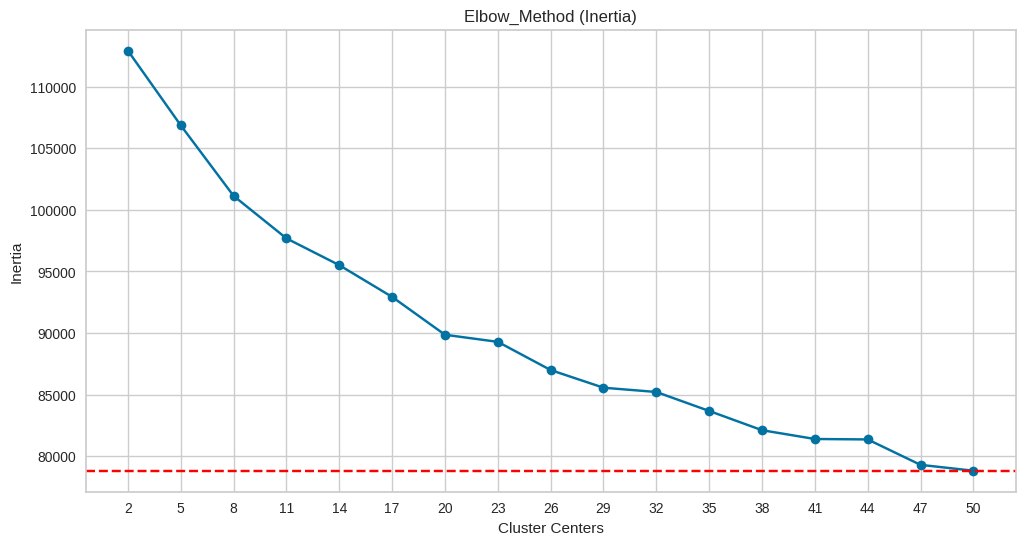

In [ ]:
# Find the Optimum K number of cluster manually by observing the inertia
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1,3)

    inertia = []
    for k in iters:
        inertia.append(MiniBatchKMeans(n_clusters=k, n_init=1, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(figsize=(12,6))
    ax.plot(iters, inertia, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow_Method (Inertia)')
    ax.axhline(min(inertia),ls='--',color='red')

# Find optimal cluster using high dimentionality dataframe
find_optimal_clusters(vz, 50)

The line is so smooth (no elbow) that it is quite hard to find optimal k value.
This may due to high dimensional data hence PCA is apply.

#### Using PCA

Fit 2 clusters
Fit 5 clusters
Fit 8 clusters
Fit 11 clusters
Fit 14 clusters
Fit 17 clusters
Fit 20 clusters
Fit 23 clusters
Fit 26 clusters
Fit 29 clusters
Fit 32 clusters
Fit 35 clusters
Fit 38 clusters
Fit 41 clusters
Fit 44 clusters
Fit 47 clusters
Fit 50 clusters


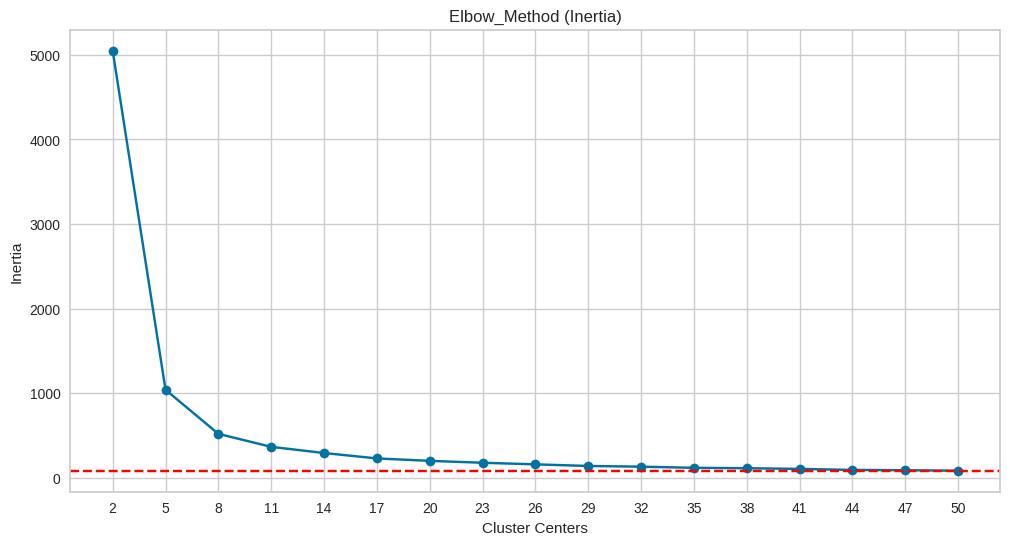

In [ ]:
# Find optimal cluster using PCA dataframe
find_optimal_clusters(X_pca, 50)

The inertia score seems to be able to stable down and elbow are almost able to observe.

The optimum k is then will need to defined using Library KElbowVisualizer by taking consideration on distortion score and fit time.

### Elbow Method with PCA

The graph below visualize the k number = 3 is the most optimal option with satisfaction between distortion score and fit time (seconds).

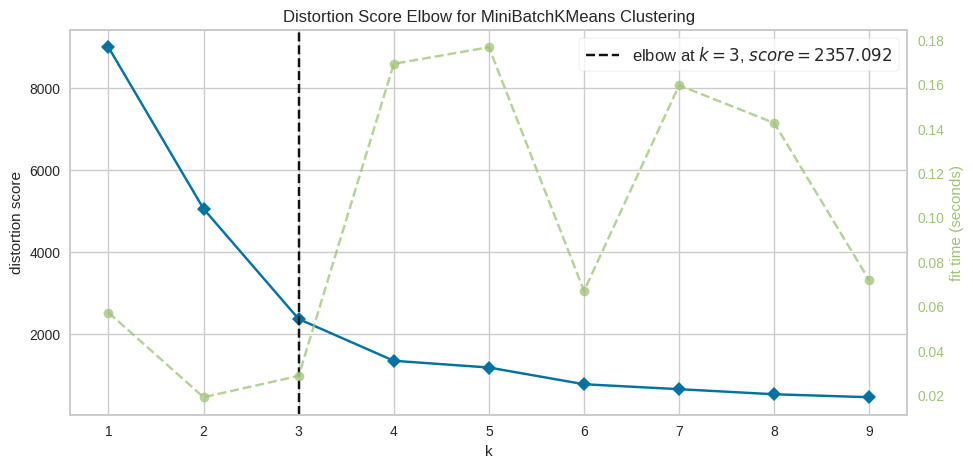

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# To determine optimum k
# Elbow method by taking consideration on distortion score and fit time.
mbk_trial = MiniBatchKMeans()
visualizer = KElbowVisualizer(mbk_trial, k=(1,10),size=(1080, 500))

visualizer.fit(X_pca)
visualizer.show()

In [ ]:
# Optimum K based on Elbow method

optimal_k = visualizer.elbow_value_
print('Optimal K found is:', optimal_k)

Optimal K found is: 3


### Modelling

K-means model initialize in mini batch approach.\
The label of clusters has been set as '0', '1', and '2'.\
The model has been clustered with label 1 in 103800 of data points, followed by label 2 in 14399 data points, and label 0 in 9412 of data points.

In [ ]:
%%time
# Default Values
# n_clusters = 8
# init = k-mean++
# max_iter = 100
# batch_size = 1024
# init_size =None


# Start Time
start_time = time.time()

# Final model with Opmimal k
num_clusters = optimal_k

# Initialize mini batch Kmean model
mbk = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, init_size=1024,batch_size=2048,
                      max_iter=1000,random_state=0)

# Fitting & Clustering
mbk.fit(X_pca)


# EndTime
end_time = time.time()
Duration_kmean = (end_time - start_time)

CPU times: user 192 ms, sys: 989 µs, total: 193 ms
Wall time: 124 ms


In [ ]:
set(mbk.labels_)

{0, 1, 2}

In [ ]:
kmeans_clusters = mbk.predict(X_pca)

# kmeans_distances = mbk.transform(X_pca)

# Find the cluster center
pred_labels = mbk.labels_;
pred_centers = mbk.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers

x         y
0  0.062989  0.511642
1 -0.070280 -0.024618
2  0.465545 -0.164769

In [ ]:
# Clustering location
clustering = pd.DataFrame(columns=['x','y','label'])
clustering['x'] = X_pca[:,0]
clustering['y'] = X_pca[:,1]
clustering['label'] = mbk.labels_

clustering.head(5)

x         y  label
0 -0.059001 -0.026483      1
1  0.022638  0.044207      1
2 -0.069783  0.033263      1
3 -0.222809 -0.150366      1
4  0.444152 -0.185117      2

In [ ]:
# Cluster Distribution
clustering['label'].value_counts()

label
1    103800
2     14399
0      9412
Name: count, dtype: int64

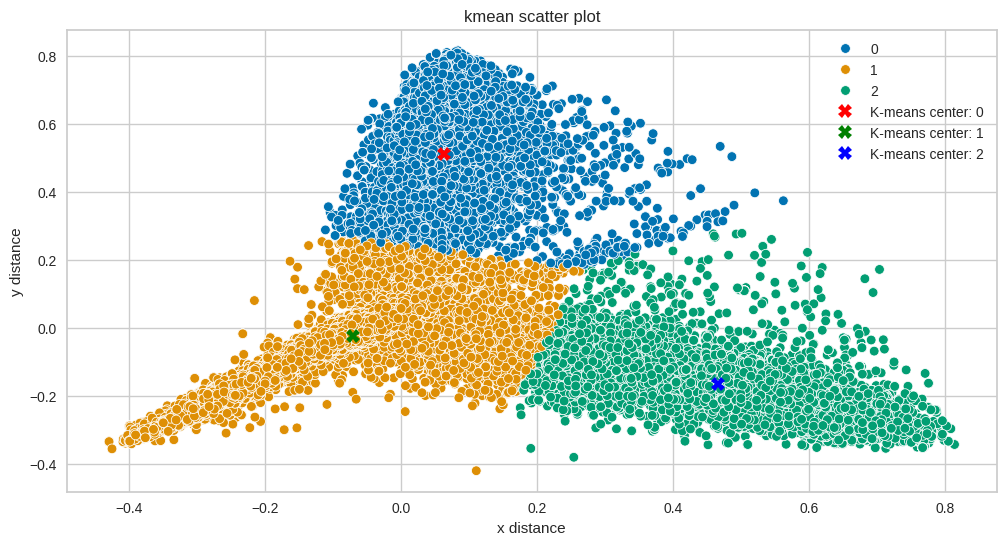

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(x= X_pca[:, 0], y=X_pca[:, 1], hue=pred_labels.tolist(),palette='colorblind')

colors = ['red', 'green', 'blue','black']

for i,color in enumerate(df_centers.index.tolist()):
    plt.plot(df_centers['x'][i], df_centers['y'][i], 'X',
             markersize=10 ,label='K-means center: %d' % i, color=colors[i])
plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('kmean scatter plot')
plt.legend()

In [ ]:
# Calculate inertia and distortion
inertia = mbk.inertia_
print("Inertia: ", inertia)

# Distortion is the same as inertia for K-means
distortion = inertia
print("Distortion: ", distortion)

Inertia:  2357.1827227324166
Distortion:  2357.1827227324166


### Model Performance

The Silhouette scores has been calculated with parallelize to speed up the computation time.\
The outcome of Silhoutte scores is approaximately 0.716 with CPU times at 2.29 second.\
The result of number of clusters used, Calinski Harabasz score, Davies Bouldin scores, Silhouette score and duration of processing time has been stored into a dataframe for comparison and visualizing purpose at the later stage.


In [ ]:
%%time

# Define function to compute silhouette score for a given cluster assignment
def compute_silhouette(cluster_labels):
    return silhouette_score(X_pca, cluster_labels)

# Parallelize the silhouette score calculation
n_jobs = -1  # Use all available cores
silhouette_scores_kmeans = Parallel(n_jobs=n_jobs)(delayed(compute_silhouette)(kmeans_clusters) for _ in range(1))

# Display the silhouette scores
print(f"Silhouette scores: {silhouette_scores_kmeans}")

Silhouette scores: [0.715729916102333]
CPU times: user 2.29 s, sys: 561 ms, total: 2.85 s
Wall time: 3min 40s


In [ ]:
# Calculate calinski_harabasz_score
calinski_mbk = calinski_harabasz_score (X_pca, mbk.predict(X_pca))

# Calculate davies_bouldin_score
davies_mbk = davies_bouldin_score (X_pca, mbk.predict(X_pca))

# ARI_mbk = adjusted_rand_score(X_pca, mbk.labels_)
# AMI_mbk = adjusted_mutual_info_score(X_pca, mbk.labels_,average_method='arithmetic')
# Hom_mbk = homogeneity_score(X_pca, mbk.labels_)
# Com_mbk = completeness_score(X_pca, mbk.labels_)
# V_mbk = v_measure_score(X_pca, mbk.labels__)
# # Silhouette_mbk = metrics.silhouette_score(X_pca, mbk.labels__)

# Tabulized Result
metric_mbk = pd.DataFrame({'model':['MiniBatchKmeans'],
                           'number_of_clusters':[len(set(mbk.labels_))],
                           'calinski_harabasz_score':[calinski_mbk],
                           'davies_bouldin_score':[davies_mbk],
                           'Silhouette scores':silhouette_scores_kmeans,
                           'Duration(s)':[Duration_kmean]
                           })

metric_mbk

model  number_of_clusters  calinski_harabasz_score  \
0  MiniBatchKmeans                   3            179745.438432   

   davies_bouldin_score  Silhouette scores  Duration(s)  
0              0.441049            0.71573     0.123643

### Cluster Analysis

In [ ]:
# Combine Clustered result to original dataframe
df['kmean_cluster'] = pred_labels

# Filter out Final text in predicted cluster
cluster1_kmean = df[df['kmean_cluster']==0]
cluster2_kmean = df[df['kmean_cluster']==1]
cluster3_kmean = df[df['kmean_cluster']==2]

df.head()

Final_Text Sentiment  kmean_cluster
0  bulb lovely bright light much warmer enjoyable...  Negative              1
1  stuff terrible idea consider bacon flavored va...  Negative              1
2  bought box baked barbeque kettle brand chip am...  Negative              1
3  view product changed since feeding halo cat se...  Negative              1
4  star review necessarily coffee inside cup way ...  Negative              2

In [ ]:
cluster1_kmean.head(5)

Final_Text Sentiment  \
27   taste pretty much like plain old liptons tea l...  Negative   
45   admit sceptical instant tea would normally let...  Negative   
99   immediately opening box lipton mandarin orange...  Negative   
132  purchased tea told help excess gas tea made wo...  Negative   
134  read nice review made purchase really cup tea ...  Negative   

     kmean_cluster  
27               0  
45               0  
99               0  
132              0  
134              0

#### Cluster + Sentiments

In [ ]:
kmean_distribution = pd.crosstab(df['kmean_cluster'], df['Sentiment'])
kmean_distribution['Total'] = kmean_distribution.sum(axis=1)
kmean_distribution

Sentiment      Negative  Neutral  Positive   Total
kmean_cluster                                     
0                  2694     3119      3599    9412
1                 35565    33736     34499  103800
2                  4278     5682      4439   14399

<Axes: xlabel='kmean_cluster'>

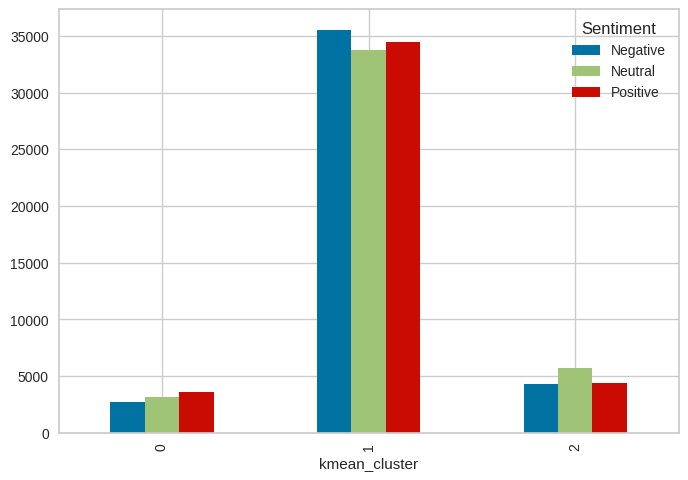

In [ ]:
kmean_distribution.drop(columns=['Total']).plot(kind='bar', stacked=False)

In [ ]:
# Split Text
df['Tokenized'] = list(df['Final_Text'].apply(lambda x:x.split(' ')))

#Rearrange Dataframe
df = df[['Final_Text','Tokenized','Sentiment','kmean_cluster']]

In [ ]:
df.head()

Final_Text  \
0  bulb lovely bright light much warmer enjoyable...   
1  stuff terrible idea consider bacon flavored va...   
2  bought box baked barbeque kettle brand chip am...   
3  view product changed since feeding halo cat se...   
4  star review necessarily coffee inside cup way ...   

                                           Tokenized Sentiment  kmean_cluster  
0  [bulb, lovely, bright, light, much, warmer, en...  Negative              1  
1  [stuff, terrible, idea, consider, bacon, flavo...  Negative              1  
2  [bought, box, baked, barbeque, kettle, brand, ...  Negative              1  
3  [view, product, changed, since, feeding, halo,...  Negative              1  
4  [star, review, necessarily, coffee, inside, cu...  Negative              2

#### Wordcloud

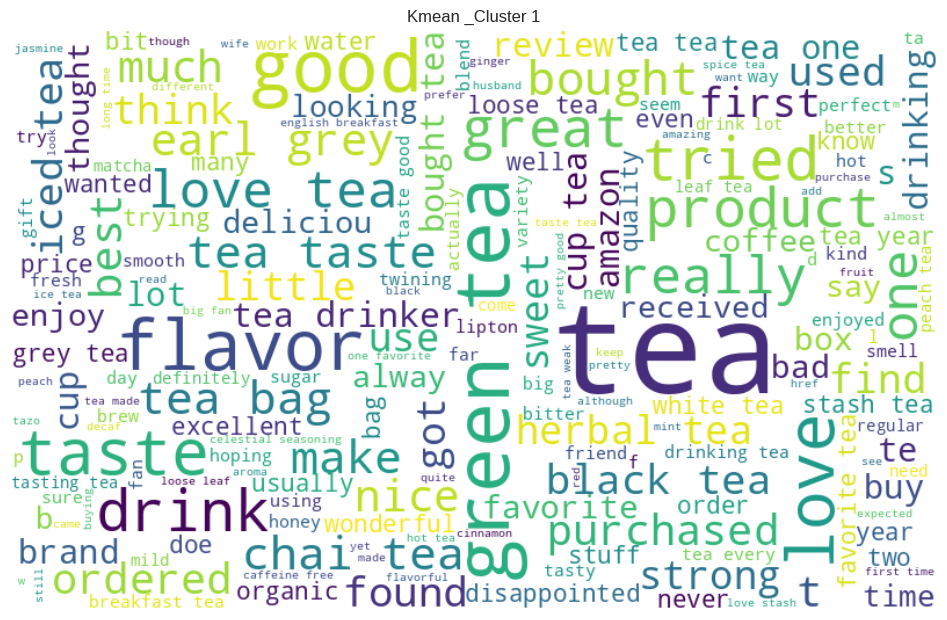

In [ ]:
#Setting up Wordcloud on cluster 1
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster1_kmean['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('Kmean _Cluster 1')
plt.tight_layout(pad=0)
plt.show()

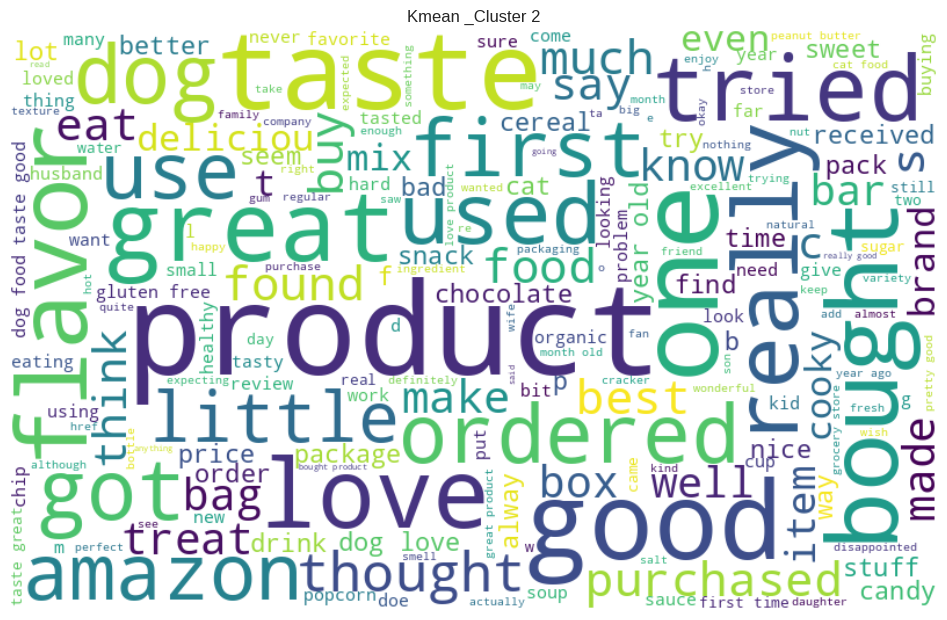

In [ ]:
#Setting up Wordcloud on cluster 2
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster2_kmean['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.title('Kmean _Cluster 2')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

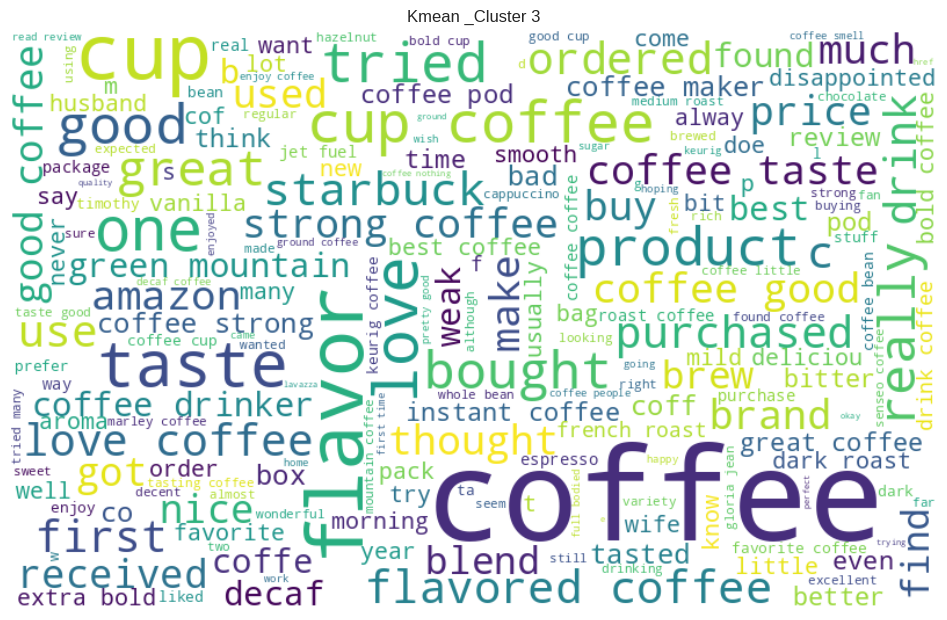

In [ ]:
#Setting up Wordcloud on cluster 3
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster3_kmean['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.title('Kmean _Cluster 3')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word Frequency

In [ ]:
# Calculate the frequency of each word in the text data
word_freq = Counter([word for tokens in df['Tokenized'] for word in tokens])

# Group the frequencies based on the cluster
# Initialize the cluster_freq dictionary dynamically based on unique clusters
unique_clusters = df['kmean_cluster'].unique()
cluster_freq = {cluster: Counter() for cluster in unique_clusters}

# Count the word frequency
for index, row in df.iterrows():
    cluster = row['kmean_cluster']
    tokens = row['Tokenized']
    cluster_freq[cluster].update(tokens)

# Get the top frequency words for each cluster
top_freq_words_kmean = pd.DataFrame({cluster: freq.most_common(10) for cluster, freq in cluster_freq.items()})
top_freq_words_kmean

1                2               0
0     (like, 54200)  (coffee, 41138)    (tea, 30657)
1  (product, 47939)     (cup, 13684)   (taste, 6506)
2    (taste, 44539)     (like, 9583)    (like, 5687)
3      (one, 37626)    (taste, 8538)  (flavor, 5456)
4     (good, 36388)   (flavor, 7772)    (good, 3604)
5     (food, 34718)     (good, 6113)   (green, 3479)
6   (flavor, 33792)      (one, 5507)     (bag, 3257)
7    (would, 30568)    (would, 4180)     (one, 3210)
8      (dog, 25591)      (pod, 3764)   (drink, 2746)
9      (get, 23560)    (roast, 3699)     (cup, 2454)

## HDBSCAN

HDBSCAN can be defined as Hierarchical DBSCAN where HDBSCAN is an improved version of DBSCAN algorithm by introducing hierarchical clustering in order to enhance outlier detection and cluster extraction performance. Unlike DBSCAN, HDBSCAN applied hierarchical density-based approach which the identified cluster will merge adjacent points with a smaller clustersWith hierarchical clustering, HDBSCAN is able to perform better than DBSCAN by overcoming the limitations of DBSCAN on identifying different density of clusters and the epsilon distance. The final outcome of both DBSCAN and HDBSCAN is identifying clusters of arbitrary shapes and densities while simultaneously detecting outliers

### Random Search Optimization


In order to determine the optimum hyperparameters, a random search technique was applied for HDBSCAN hyperparameter optimization by providing a range of “min_samples” and “min_cluster_size” and using “DBCV” as a validating score

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
import hdbscan
from sklearn.metrics import make_scorer

hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(X_pca)

# specify parameter for min_samples and min_cluster_size which highly impacting the clustering results
param_dist = {'min_samples': list(range(5,51,5)),
              'min_cluster_size': list(range(500,8001,500))}

#validity_scroer
validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)

n_iter_search = 20
random_search = RandomizedSearchCV(hdb
                                   ,param_distributions=param_dist
                                   ,n_iter=n_iter_search
                                   ,scoring=validity_scorer,
                                   n_jobs=-1)

# Best_param_HDBSCAN
result = random_search.fit(X_pca)

print(f"Best Parameters {random_search.best_params_}")
print(f"DBCV score :{random_search.best_estimator_.relative_validity_}")

Best Parameters {'min_samples': 25, 'min_cluster_size': 6500}
DBCV score :0.06771271235323602
CPU times: user 23 s, sys: 1.57 s, total: 24.5 s
Wall time: 8min 33s


### Modelling

The HDBSCAN using the best parameter and provide the outcome of clusters label in 3 and number of outlier in 7995.\
The outliers will be label in '-1'.

In [ ]:
# Start Time
start_time = time.time()

# HDBSCAN with best param from
hdb = hdbscan.HDBSCAN(min_cluster_size=random_search.best_params_['min_cluster_size'],
              min_samples=random_search.best_params_['min_samples']).fit(X_pca)

# Get the cluster labels
hdb_labels = hdb.labels_

# EndTime
end_time = time.time()
Duration_hdbscan = end_time - start_time

In [ ]:
n_clusters_ = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
n_noise_ = list(hdb_labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

Number of Clusters :  3
Number of Outliers :  7995


In [ ]:
# Cluster Label
df['HDBSCAN_cluster'] = hdb_labels
df['HDBSCAN_cluster'].value_counts()

HDBSCAN_cluster
 2    100292
 1     10323
 0      9001
-1      7995
Name: count, dtype: int64

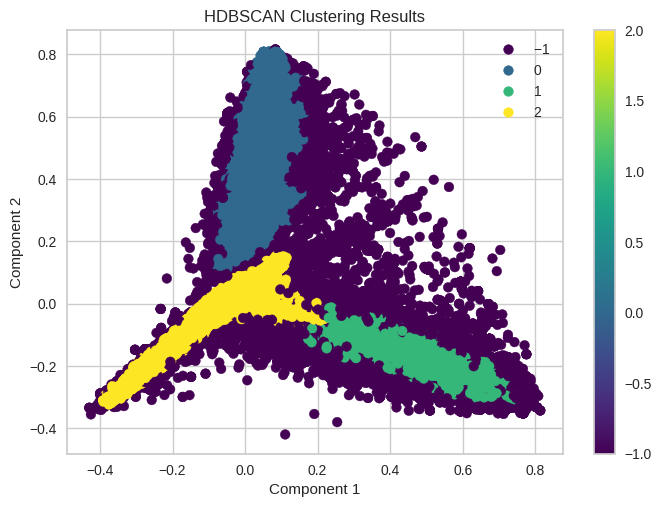

In [ ]:
# Plot the scatter plot
HDBSCAN_scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hdb_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('HDBSCAN Clustering Results')
plt.legend(*HDBSCAN_scatter.legend_elements())
plt.colorbar()
plt.show()

### Model Performance

The Silhouette scores has been calculated with parallelize to speed up the computation time.
The outcome of Silhoutte scores is approaximately 0.613 with CPU times at 2.68 second.
The result of number of clusters used, Calinski Harabasz score, Davies Bouldin scores, Silhouette score and duration of processing time has been stored into a dataframe for comparison and visualizing purpose at the later stage.

In [ ]:
%%time

# Define function to compute silhouette score for a given cluster assignment
def compute_silhouette(cluster_labels):
    # Silhouette score is only valid if number of clusters is more than 1
    if len(set(cluster_labels)) > 1:
        return silhouette_score(X_pca, cluster_labels)
    else:
        return -1  # Return -1 to indicate that silhouette score is not applicable

# Parallelize the silhouette score calculation
n_jobs = -1  # Use all available cores
silhouette_scores_hdbscan = Parallel(n_jobs=n_jobs)(delayed(compute_silhouette)(hdb_labels) for _ in range(1))

# Display the silhouette scores
print(f"Silhouette scores: {silhouette_scores_hdbscan}")

Silhouette scores: [0.6129202539288493]
CPU times: user 2.68 s, sys: 615 ms, total: 3.29 s
Wall time: 3min 59s


In [ ]:
calinski_hdb = calinski_harabasz_score (X_pca, hdb_labels)
davies_hdb = davies_bouldin_score (X_pca, hdb_labels)

# ARI_mbk = metrics.adjusted_rand_score(X_pca, mbk.labels_)
# AMI_mbk = metrics.adjusted_mutual_info_score(X_pca, mbk.labels_,average_method='arithmetic')
# Hom_mbk = metrics.homogeneity_score(X_pca, mbk.labels_)
# Com_mbk = metrics.completeness_score(X_pca, mbk.labels_)
# V_mbk = : metrics.v_measure_score(X_pca, mbk.labels__)
# Silhouette_mbk = metrics.silhouette_score(X_pca, mbk.labels__)

metric_hdb = pd.DataFrame({'model':['HDBSCAN'],
                          'number_of_clusters':[len(set(hdb_labels))],
                           'calinski_harabasz_score':[calinski_hdb],
                           'davies_bouldin_score':[davies_hdb],
                          'Silhouette scores':silhouette_scores_hdbscan,
                          'Duration(s)':[Duration_hdbscan]
                          })

metric_hdb

model  number_of_clusters  calinski_harabasz_score  davies_bouldin_score  \
0  HDBSCAN                   4              86990.94063              1.411736   

   Silhouette scores  Duration(s)  
0            0.61292     5.928909

### Cluster Anlysis

In [ ]:
df['HDBSCAN_cluster'].unique()

array([ 2,  1, -1,  0])

In [ ]:
# Filter out Final text in predicted cluster
cluster1_hdbscan = df[df['HDBSCAN_cluster']==0]
cluster2_hdbscan = df[df['HDBSCAN_cluster']==1]
cluster3_hdbscan = df[df['HDBSCAN_cluster']==2]

df.head()

Final_Text  \
0  bulb lovely bright light much warmer enjoyable...   
1  stuff terrible idea consider bacon flavored va...   
2  bought box baked barbeque kettle brand chip am...   
3  view product changed since feeding halo cat se...   
4  star review necessarily coffee inside cup way ...   

                                           Tokenized Sentiment  kmean_cluster  \
0  [bulb, lovely, bright, light, much, warmer, en...  Negative              1   
1  [stuff, terrible, idea, consider, bacon, flavo...  Negative              1   
2  [bought, box, baked, barbeque, kettle, brand, ...  Negative              1   
3  [view, product, changed, since, feeding, halo,...  Negative              1   
4  [star, review, necessarily, coffee, inside, cu...  Negative              2   

   HDBSCAN_cluster  
0                2  
1                2  
2                2  
3                2  
4                1

#### Cluster + Sentiments

In [ ]:
HDBSCAN_distribution = pd.crosstab(df['HDBSCAN_cluster'], df['Sentiment'])
HDBSCAN_distribution['Total'] = HDBSCAN_distribution.sum(axis=1)
HDBSCAN_distribution

Sentiment        Negative  Neutral  Positive   Total
HDBSCAN_cluster                                     
-1                   2477     2796      2722    7995
 0                   2580     3010      3411    9001
 1                   3045     4177      3101   10323
 2                  34435    32554     33303  100292

<Axes: xlabel='HDBSCAN_cluster'>

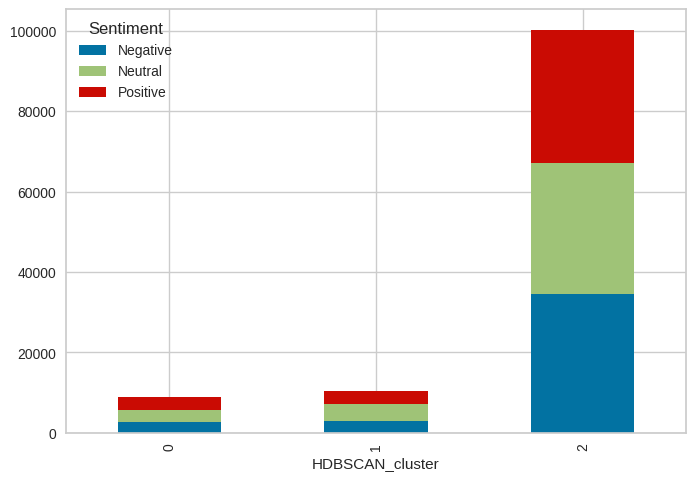

In [ ]:
HDBSCAN_distribution[(HDBSCAN_distribution.index !=-1)].drop(columns=['Total']).plot(kind='bar', stacked=True)

#### WordCloud

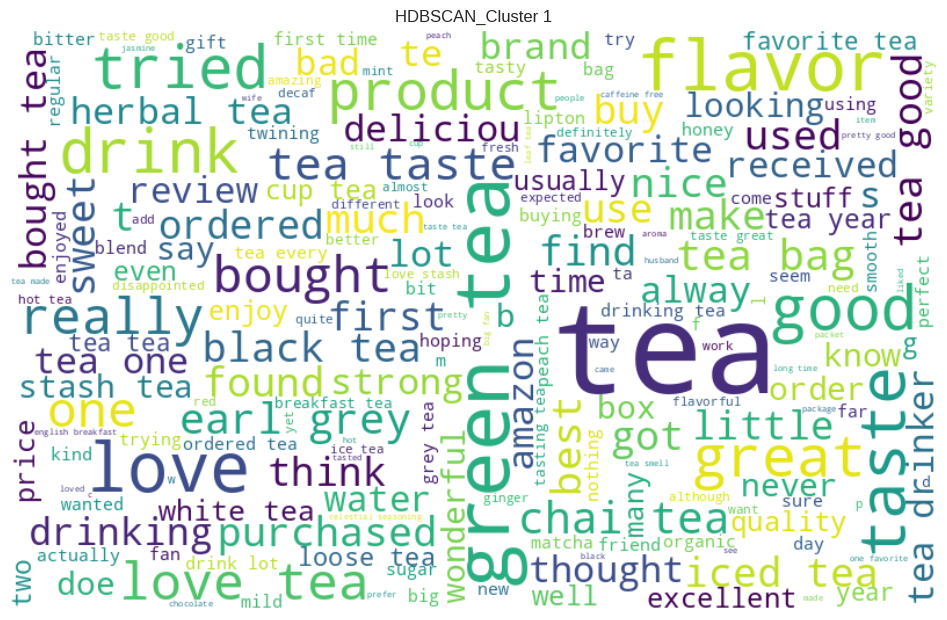

In [ ]:
#Setting up Wordcloud on cluster 1
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster1_hdbscan['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('HDBSCAN_Cluster 1')
plt.tight_layout(pad=0)
plt.show()

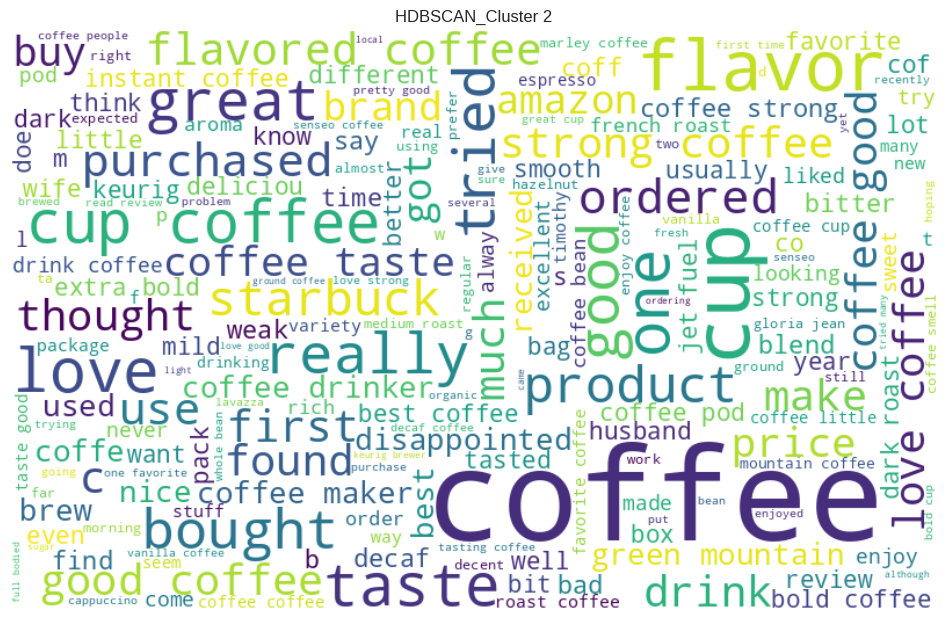

In [ ]:
#Setting up Wordcloud on cluster 2
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster2_hdbscan['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.title('HDBSCAN_Cluster 2')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

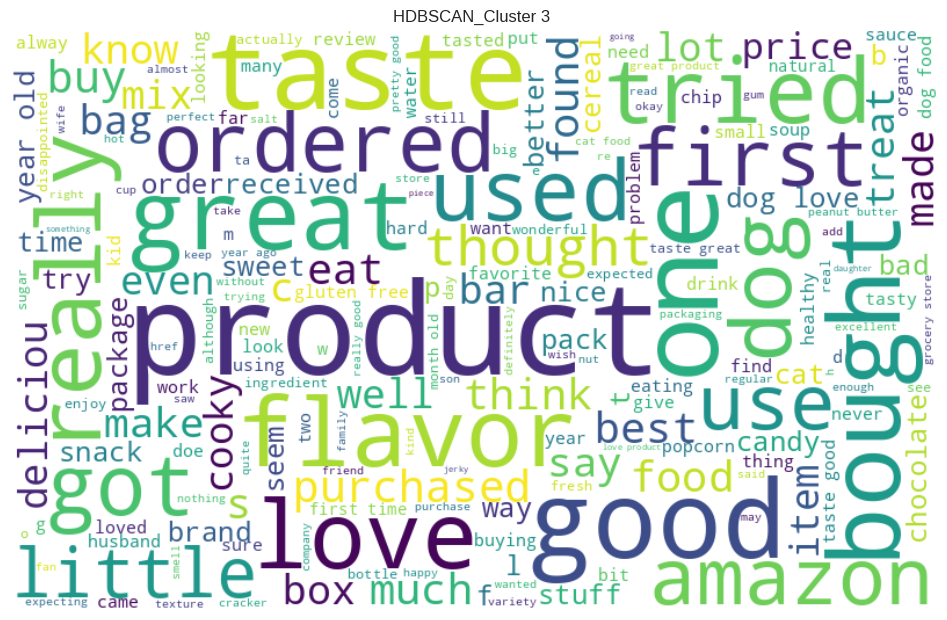

In [ ]:
#Setting up Wordcloud on cluster 3
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster3_hdbscan['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.title('HDBSCAN_Cluster 3 ')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Word Frequency

In [ ]:
# Calculate the frequency of each word in the text data
word_freq = Counter([word for tokens in df['Tokenized'] for word in tokens])

# Group the frequencies based on the cluster
# Initialize the cluster_freq dictionary dynamically based on unique clusters
unique_clusters = df['HDBSCAN_cluster'].unique()
cluster_freq = {cluster: Counter() for cluster in unique_clusters}

# Count the word frequency
for index, row in df.iterrows():
    cluster = row['HDBSCAN_cluster']
    tokens = row['Tokenized']
    cluster_freq[cluster].update(tokens)

# Get the top frequency words for each cluster
top_freq_words_dbscan = pd.DataFrame({cluster: freq.most_common(10) for cluster, freq in cluster_freq.items()})
top_freq_words_dbscan

2                1               -1                0
0     (like, 51872)  (coffee, 28525)  (coffee, 14700)     (tea, 27897)
1  (product, 45231)     (cup, 10004)      (cup, 6553)    (taste, 6259)
2    (taste, 42389)     (like, 6577)     (like, 5499)     (like, 5522)
3      (one, 35942)    (taste, 5552)    (taste, 5383)   (flavor, 5129)
4     (good, 35034)   (flavor, 4791)   (flavor, 5054)     (good, 3588)
5     (food, 33194)     (good, 4548)      (tea, 4746)    (green, 3340)
6   (flavor, 32046)      (one, 3907)  (product, 4023)      (one, 3139)
7    (would, 29267)    (would, 2987)      (one, 3355)      (bag, 2975)
8      (dog, 24268)    (roast, 2735)     (good, 2935)    (drink, 2769)
9      (get, 22481)      (pod, 2630)    (would, 2539)  (product, 2282)

## BIRCH

BIRCH is an efficient data clustering algorithm designed for large datasets. The way BIRCH works is divided into two phases. In the first phase, it constructs a Clustering Features (CF) tree using local clustering. During an incremental scan of the data, it creates summaries (micro-clusters) based on Clustering Features. These concise forms are a hierarchical tree-like structure called the CF tree which organizes data in memory. This phase involves making local decisions without scanning all points or clusters which makes it efficient. Subsequently, BIRCH performs global clustering on subclusters obtained from the CF tree. It can also perform outlier detection by treating points in sparse regions separately.

### Threshold Justification

In [ ]:
%%time

# Using data X-pca
X_pca_subset = X_pca[:127611]

# Convert X_pca_subset to a sparse matrix
X_pca_sparse = csr_matrix(X_pca_subset)

# Define a range of k values to iterate
k_values = range(2, 21)  # Iterate k from 2 to 20

# Define a range of threshold values to iterate
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5]

def compute_silhouette_score(X, model, batch):
    cluster_labels = model.predict(X[batch])
    if len(np.unique(cluster_labels)) == 1:
        return None  # Skip calculation if only one cluster is found
    return silhouette_samples(X[batch], cluster_labels)

# Initialize variables to store the best silhouette score, corresponding k, and threshold
best_score = -1
best_k = -1
best_threshold = None

# Iterate over each threshold value
for threshold in threshold_values:
    # Iterate over each k value
    for k in k_values:
        # Fit the BIRCH model
        model = Birch(threshold=threshold, n_clusters=k)
        model.fit(X_pca_sparse)

        # Check the number of unique labels
        unique_labels = np.unique(model.labels_)
        if len(unique_labels) == 1:
            continue  # Skip calculation if only one cluster is found

        # Calculate silhouette scores in parallel
        n_jobs = -1  # Use all available CPU cores
        batch_size = 1000  # Batch size for parallel processing
        silhouettes = Parallel(n_jobs=n_jobs)(
            delayed(compute_silhouette_score)(X_pca_sparse, model, batch)
            for batch in gen_batches(X_pca_sparse.shape[0], batch_size)
        )
        silhouettes = np.concatenate(silhouettes)

        # Calculate the mean silhouette score
        score = np.mean(silhouettes)

        # Update the best score, k, and threshold if the current score is better
        if score > best_score:
            best_score = score
            best_k = k
            best_threshold = threshold

print(f"Optimal number of clusters (k): {best_k}")
print(f"Optimal threshold: {best_threshold}")
print(f"Silhouette score: {best_score}")

Optimal number of clusters (k): 3
Optimal threshold: 0.2
Silhouette score: 0.7158868930715993
CPU times: user 5min 8s, sys: 3.73 s, total: 5min 12s
Wall time: 8min 54s


### Elbow Method

The Elbow method applied to obtain the optimal k-number which result in 3 clusters with distortion score at 2356.598.

threshold: 0.2
Elbow Method to determine the number of clusters to be formed:


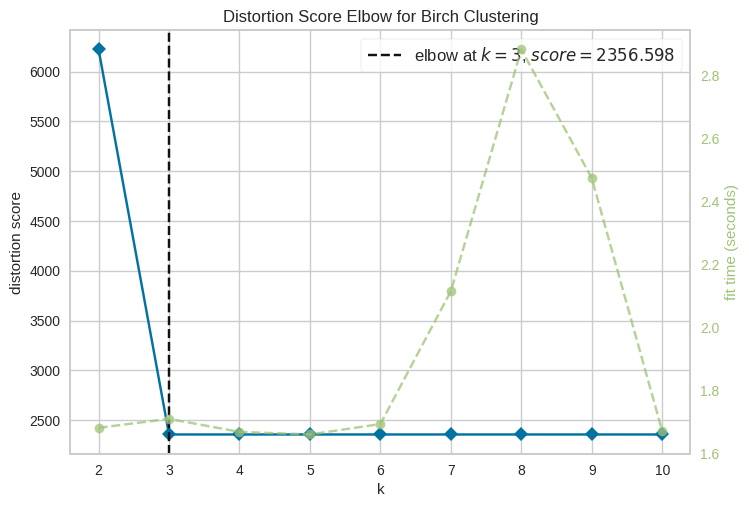

<Axes: title={'center': 'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Threshold
threshold = best_threshold
print('threshold:',threshold)

# find the optimum K for BIRCH
BP = Birch(threshold=threshold)
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(BP, k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

In [ ]:
# Optimum K based on Elbow method for BIRCH

optimum_k = Elbow_M.elbow_value_
print('Optimal K found is:', optimum_k)

Optimal K found is: 3


### Modelling

The threshold and optimum k-number has been set as 0.2 and 3 respectively.\
The other default parameters are applied in the BIRCH model shows as below:

Number of Clusters: 3\
Threshold: 0.2\
Default Compute Labels: True\
Default Branching Factor: 50\
Default Max Samples: None

In [ ]:
%%time

# Start Time
start_time = time.time()

# Setup threshold and k values
threshold = best_threshold
optimum_k = optimum_k

cluster_birch =Birch(threshold=threshold,n_clusters=optimum_k).fit(X_pca)
Birch_labels = cluster_birch.labels_
print(cluster_birch)

# EndTime
end_time = time.time()
Duration_birch = end_time - start_time

Birch(threshold=0.2)
CPU times: user 1.7 s, sys: 8.85 ms, total: 1.71 s
Wall time: 1.7 s


In [ ]:
from sklearn.cluster import Birch
import inspect

# Access the default parameter values
default_params = inspect.signature(Birch.__init__).parameters
default_n_clusters = default_params['n_clusters'].default
default_threshold = best_threshold
default_compute_labels = default_params['compute_labels'].default
default_branching_factor = default_params['branching_factor'].default

# Set a default value for max_samples if it is not present in the default parameters
default_max_samples = default_params.get('max_samples', None)

# Print the default parameter values
print("Number of Clusters:", default_n_clusters)
print("Threshold:", default_threshold)
print("Default Compute Labels:", default_compute_labels)
print("Default Branching Factor:", default_branching_factor)
print("Default Max Samples:", default_max_samples)

Number of Clusters: 3
Threshold: 0.2
Default Compute Labels: True
Default Branching Factor: 50
Default Max Samples: None


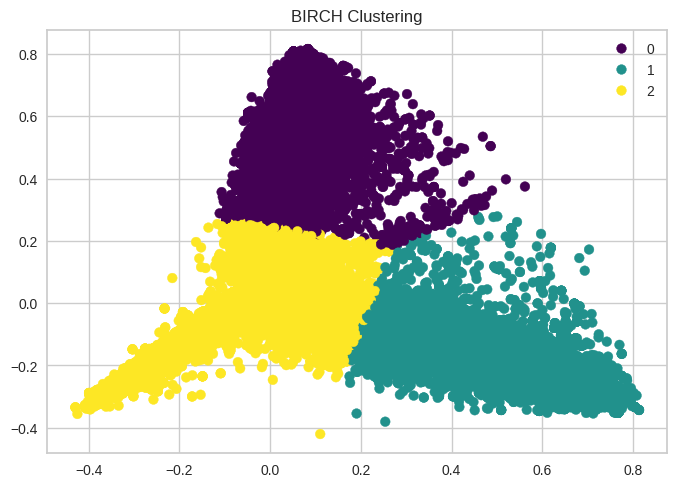

In [ ]:
# Plot clustering diagram
plt.figure()
birch_scatter = plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=cluster_birch.labels_,cmap='viridis',label=cluster_birch.labels_)
plt.title("BIRCH Clustering")
plt.legend(*birch_scatter.legend_elements())
plt.show()

In [ ]:
# Combine Clustered label to dataframe
df['BIRCH_cluster'] = cluster_birch.labels_
df.head()

Final_Text  \
0  bulb lovely bright light much warmer enjoyable...   
1  stuff terrible idea consider bacon flavored va...   
2  bought box baked barbeque kettle brand chip am...   
3  view product changed since feeding halo cat se...   
4  star review necessarily coffee inside cup way ...   

                                           Tokenized Sentiment  kmean_cluster  \
0  [bulb, lovely, bright, light, much, warmer, en...  Negative              1   
1  [stuff, terrible, idea, consider, bacon, flavo...  Negative              1   
2  [bought, box, baked, barbeque, kettle, brand, ...  Negative              1   
3  [view, product, changed, since, feeding, halo,...  Negative              1   
4  [star, review, necessarily, coffee, inside, cu...  Negative              2   

   HDBSCAN_cluster  BIRCH_cluster  
0                2              2  
1                2              2  
2                2              2  
3                2              2  
4                1              1

In [ ]:
df['BIRCH_cluster'].value_counts()

BIRCH_cluster
2    103851
1     14408
0      9352
Name: count, dtype: int64

### Model Performance

The Silhouette scores has been calculated with parallelize to speed up the computation time.\
The outcome of Silhoutte scores is approaximately 0.716 with CPU times at 2.39 second.\
The result of number of clusters used, Calinski Harabasz score, Davies Bouldin scores, Silhouette score and duration of processing time has been stored into a dataframe for comparison and visualizing purpose at the later stage.

In [ ]:
%%time

# Define function to compute silhouette score for a given cluster assignment
def compute_silhouette(cluster_labels):
    # Silhouette score is only valid if number of clusters is more than 1
    if len(set(cluster_labels)) > 1:
        return silhouette_score(X_pca, cluster_labels)
    else:
        return -1  # Return -1 to indicate that silhouette score is not applicable

# Parallelize the silhouette score calculation
n_jobs = -1  # Use all available cores
silhouette_scores_birch = Parallel(n_jobs=n_jobs)(delayed(compute_silhouette)(Birch_labels) for _ in range(1))

# Display the silhouette scores
print(f"Silhouette scores: {silhouette_scores_birch}")

Silhouette scores: [0.7160070353676433]
CPU times: user 2.39 s, sys: 449 ms, total: 2.84 s
Wall time: 3min 36s


In [ ]:
# Calculate calinski_harabasz_score
calinski_birch = calinski_harabasz_score (X_pca, cluster_birch.predict(X_pca))

# Calculate davies_bouldin_score
davies_birch = davies_bouldin_score (X_pca, cluster_birch.predict(X_pca))

# ARI_mbk = metrics.adjusted_rand_score(X_pca, mbk.labels_)
# AMI_mbk = metrics.adjusted_mutual_info_score(X_pca, mbk.labels_,average_method='arithmetic')
# Hom_mbk = metrics.homogeneity_score(X_pca, mbk.labels_)
# Com_mbk = metrics.completeness_score(X_pca, mbk.labels_)
# V_mbk = : metrics.v_measure_score(X_pca, mbk.labels__)
# Silhouette_mbk = metrics.silhouette_score(X_pca, mbk.labels__)

# Tabulized Result
metric_birch = pd.DataFrame({'model':['BIRCH'],
                             'number_of_clusters':[len(set(cluster_birch.labels_))],
                            'calinski_harabasz_score':[calinski_birch],
                            'davies_bouldin_score':[davies_birch],
                            'Silhouette scores':silhouette_scores_birch,
                             'Duration(s)':[Duration_birch]
                             })

metric_birch

model  number_of_clusters  calinski_harabasz_score  davies_bouldin_score  \
0  BIRCH                   3            179756.765519                0.4403   

   Silhouette scores  Duration(s)  
0           0.716007      1.70155

### Cluster Analysis

In [ ]:
df['BIRCH_cluster'].unique()

array([2, 1, 0])

In [ ]:
# Filter out Final text in predicted cluster
cluster1_birch = df[df['BIRCH_cluster']==0]
cluster2_birch = df[df['BIRCH_cluster']==1]
cluster3_birch = df[df['BIRCH_cluster']==2]

df.head()

Final_Text  \
0  bulb lovely bright light much warmer enjoyable...   
1  stuff terrible idea consider bacon flavored va...   
2  bought box baked barbeque kettle brand chip am...   
3  view product changed since feeding halo cat se...   
4  star review necessarily coffee inside cup way ...   

                                           Tokenized Sentiment  kmean_cluster  \
0  [bulb, lovely, bright, light, much, warmer, en...  Negative              1   
1  [stuff, terrible, idea, consider, bacon, flavo...  Negative              1   
2  [bought, box, baked, barbeque, kettle, brand, ...  Negative              1   
3  [view, product, changed, since, feeding, halo,...  Negative              1   
4  [star, review, necessarily, coffee, inside, cu...  Negative              2   

   HDBSCAN_cluster  BIRCH_cluster  
0                2              2  
1                2              2  
2                2              2  
3                2              2  
4                1              1

#### Cluster + Sentiments

In [ ]:
BIRCH_distribution = pd.crosstab(df['BIRCH_cluster'], df['Sentiment'])
BIRCH_distribution['Total'] = BIRCH_distribution.sum(axis=1)
BIRCH_distribution

Sentiment      Negative  Neutral  Positive   Total
BIRCH_cluster                                     
0                  2675     3104      3573    9352
1                  4283     5683      4442   14408
2                 35579    33750     34522  103851

<Axes: xlabel='BIRCH_cluster'>

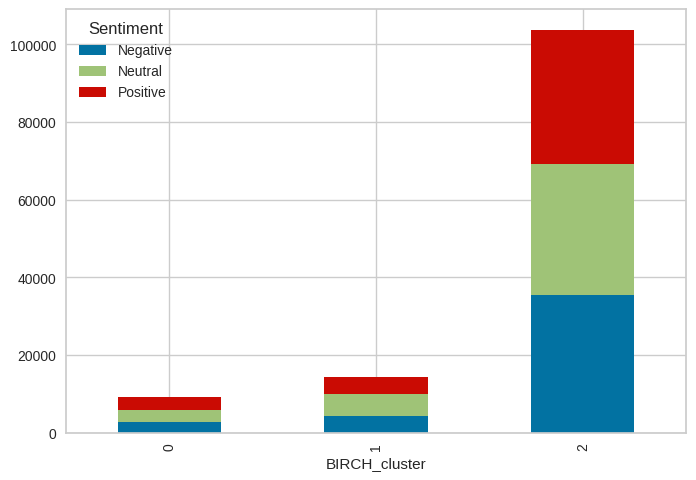

In [ ]:
BIRCH_distribution.drop(columns=['Total']).plot(kind='bar', stacked=True)

#### WordCloud

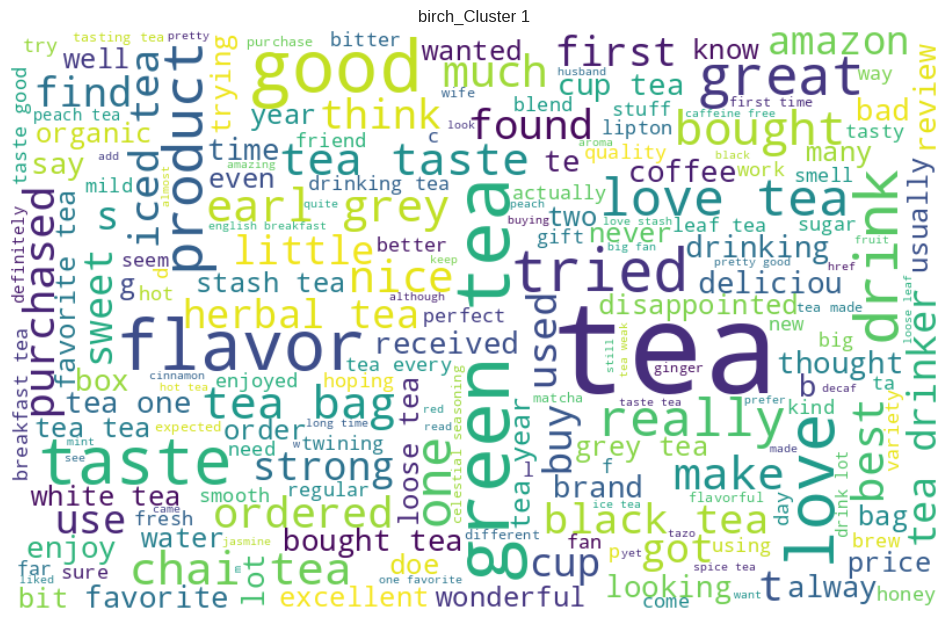

In [ ]:
#Setting up Wordcloud on cluster 1
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster1_birch['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('birch_Cluster 1')
plt.tight_layout(pad=0)
plt.show()

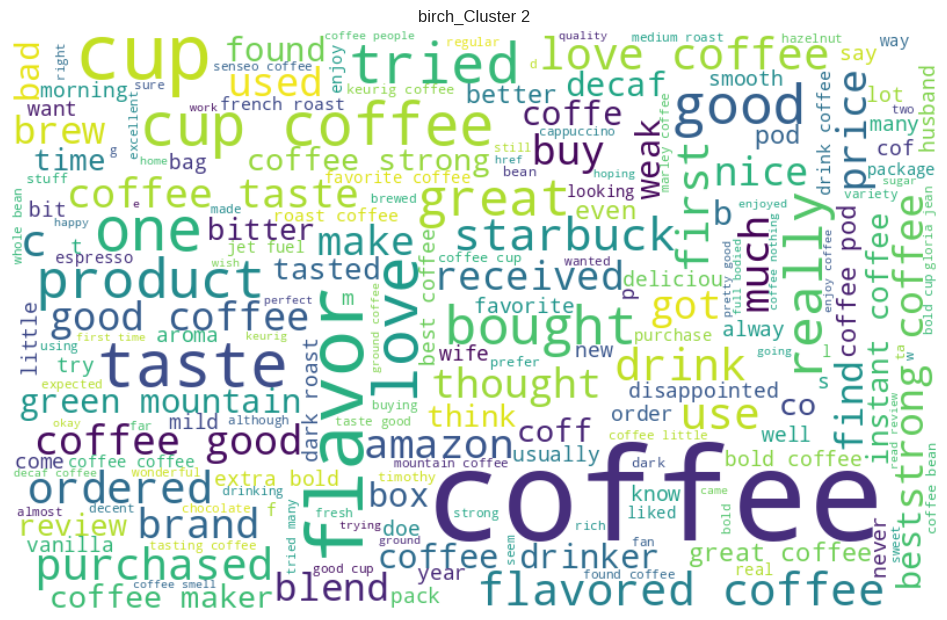

In [ ]:
#Setting up Wordcloud on cluster 2
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster2_birch['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('birch_Cluster 2')
plt.tight_layout(pad=0)
plt.show()

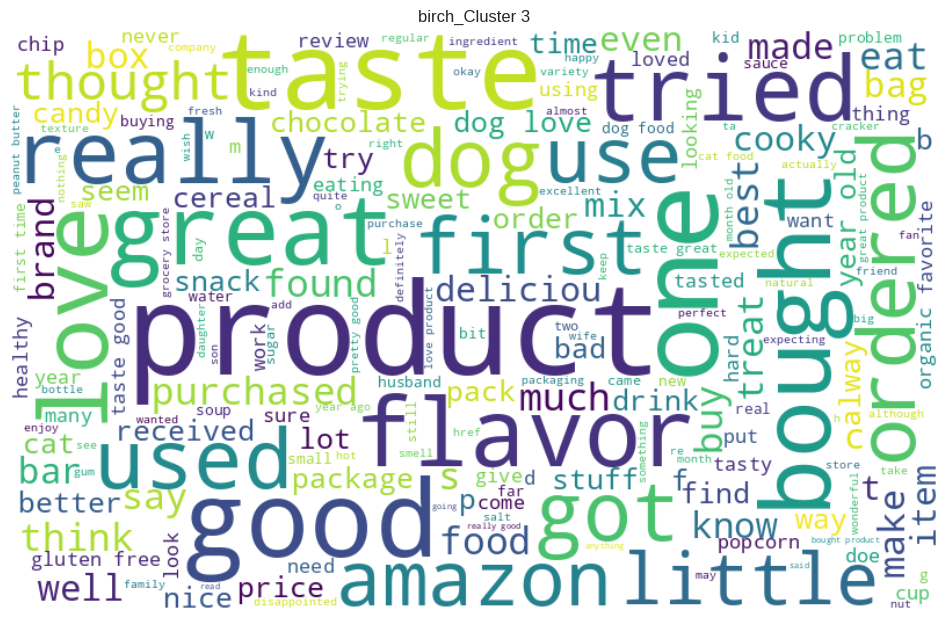

In [ ]:
#Setting up Wordcloud on cluster 3
from wordcloud import WordCloud

fig = plt.figure(figsize = (12, 6))

wc_pos = WordCloud(width=800, height=500, random_state=3, max_font_size=110,
                   background_color = 'white').generate(cluster3_birch['Final_Text'].to_string())

#Display plot
plt.imshow(wc_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('birch_Cluster 3')
plt.tight_layout(pad=0)
plt.show()

#### Word Frequency

In [ ]:
# Calculate the frequency of each word in the text data
word_freq = Counter([word for tokens in df['Tokenized'] for word in tokens])

# Group the frequencies based on the cluster
# Initialize the cluster_freq dictionary dynamically based on unique clusters
unique_clusters = df['BIRCH_cluster'].unique()
cluster_freq = {cluster: Counter() for cluster in unique_clusters}

# Count the word frequency
for index, row in df.iterrows():
    cluster = row['BIRCH_cluster']
    tokens = row['Tokenized']
    cluster_freq[cluster].update(tokens)

# Get the top frequency words for each cluster
top_freq_words_birch = pd.DataFrame({cluster: freq.most_common(10) for cluster, freq in cluster_freq.items()})
top_freq_words_birch

2                1               0
0     (like, 54237)  (coffee, 41147)    (tea, 30592)
1  (product, 47958)     (cup, 13689)   (taste, 6462)
2    (taste, 44577)     (like, 9590)    (like, 5643)
3      (one, 37649)    (taste, 8544)  (flavor, 5414)
4     (good, 36402)   (flavor, 7773)    (good, 3588)
5     (food, 34721)     (good, 6115)   (green, 3471)
6   (flavor, 33833)      (one, 5509)     (bag, 3254)
7    (would, 30575)    (would, 4182)     (one, 3185)
8      (dog, 25591)      (pod, 3764)   (drink, 2727)
9      (get, 23572)    (roast, 3699)     (cup, 2437)

# Model Evaluation

The result of the clusters are shows as below.\
The highest number of data points for Kmeans is label 1 (103800), followed by label 2 (14399) and label 0 (9412).


For HDBSCAN model, the highest number of data points is label 2 (100292), followed by label 1 (10323), then is label 0 (9001), and label -1 (7995). In this model, the noise or outliers has been identified which is different than the other 2 models.


For BIRCH model, the highest number of data points is label 2 (103851), followed by label 1 (14408), and label 0 (9352).


Summary:

* All three algorithms identified a similar structure in the data with 3 main clusters.
* KMeans and BIRCH don't report any outliers, while HDBSCAN isolates potential outliers in a separate cluster.
* The consistency across algorithms suggests a robust clustering structure.


In [ ]:
clusters = df[['kmean_cluster', 'HDBSCAN_cluster', 'BIRCH_cluster']]

for col in clusters.columns:
  print(clusters[col].value_counts())
  print('\n')

kmean_cluster
1    103800
2     14399
0      9412
Name: count, dtype: int64


HDBSCAN_cluster
 2    100292
 1     10323
 0      9001
-1      7995
Name: count, dtype: int64


BIRCH_cluster
2    103851
1     14408
0      9352
Name: count, dtype: int64




**MiniBatchKmeans:**

*  The model has identified 3 clusters.
* Achieved the highest Calinski-Harabasz score (179745.438432), it indicates the best separation between clusters.
* It had a moderate Davies-Bouldin score (0.441049) and Silhouette score (0.715730) which suggesting a decent within-cluster tightness and overall quality.
* This is the fastest model (0.123643 seconds).

**HDBSCAN:**

* The model has identified 4 clusters.
* It had a lower Calinski-Harabasz score (86990.940630) compared to MiniBatchKmeans which indicating a less separation between clusters.
* It had a higher Davies-Bouldin score (1.411736) compared to MiniBatchKmeans which suggesting a looser clusters.
* The model had a moderate Silhouette score (0.612920), it indicates that a trade-off between separation and tightness.
* It took significantly longer (5.928909 seconds) compared to MiniBatchKmeans.

**BIRCH:**

* The model identified 3 clusters which similar to MiniBatchKmeans.
* It achieved a Calinski-Harabasz score (179756.765519) very similar to MiniBatchKmeans which indicating a comparable separation.
* It had a slightly lower Davies-Bouldin score (0.440300) compared to MiniBatchKmeans, it is suggesting a touch tighter within-cluster structure.
* The BIRCH model had a moderate Silhouette score (0.716007) which is similar to MiniBatchKmeans.
* It took longer (1.701550 seconds) compared to MiniBatchKmeans but is much more faster than HDBSCAN.

**Choosing the Best Model:**

Based on the Calinski-Harabasz score, MiniBatchKmeans seems to have achieved the best separation between clusters.
Considering both separation and tightness (measured by Silhouette score), MiniBatchKmeans and BIRCH perform similarly well.
As taking speed into consideration, the MiniBatchKmeans is the clear winner.

In [ ]:
#Combine model performance for comparison
Evaluation = all_metrics = pd.concat([metric_mbk, metric_hdb, metric_birch],axis=0)
Evaluation.set_index('model',inplace=True)

Evaluation

number_of_clusters  calinski_harabasz_score  \
model                                                          
MiniBatchKmeans                   3            179745.438432   
HDBSCAN                           4             86990.940630   
BIRCH                             3            179756.765519   

                 davies_bouldin_score  Silhouette scores  Duration(s)  
model                                                                  
MiniBatchKmeans              0.441049           0.715730     0.123643  
HDBSCAN                      1.411736           0.612920     5.928909  
BIRCH                        0.440300           0.716007     1.701550

Based on the Silhouette scores, KMeans and BIRCH models has similar good results while DBSCAN model has the poorest performance of approximately -0.59.



In [ ]:
import matplotlib.pyplot as plt

# Compare the silhouette scores
compare_scores = {
    "KMeans": silhouette_scores_kmeans[0],
    "HDBSCAN": silhouette_scores_hdbscan[0],
    "BIRCH": silhouette_scores_birch[0]
}

# Display the comparison of silhouette compare_scores
print("\nComparison of Silhouette Scores:")
for model, score in compare_scores.items():
    print(f"{model}: {score}")


Comparison of Silhouette Scores:
KMeans: 0.715729916102333
HDBSCAN: 0.6129202539288493
BIRCH: 0.7160070353676433


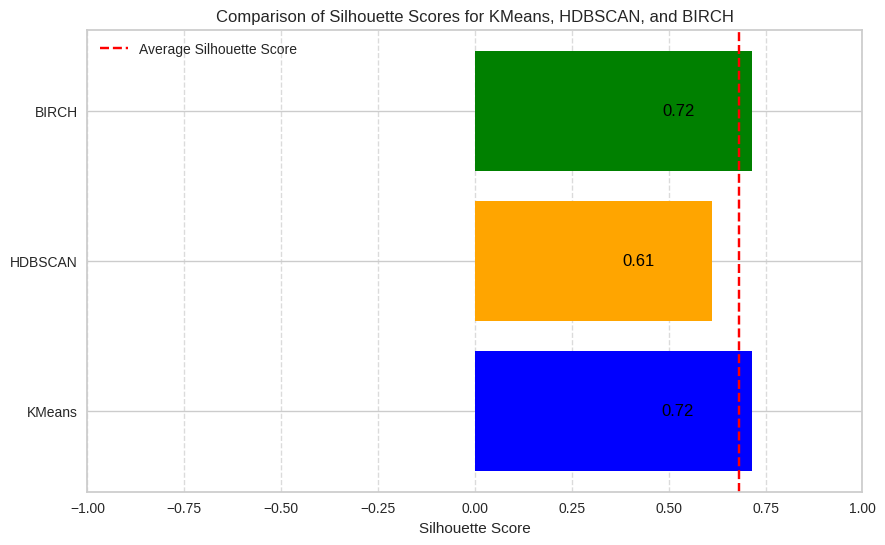

In [ ]:
# Calculate average silhouette score
average_silhouette_score = np.mean(list(compare_scores.values()))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
bars = plt.barh(list(compare_scores.keys()), compare_scores.values(), color=['blue', 'orange', 'green'])
plt.axvline(x=average_silhouette_score, color='red', linestyle='--', label='Average Silhouette Score')
plt.xlabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores for KMeans, HDBSCAN, and BIRCH')
plt.xlim(-1, 1)  # Setting x-axis limit to better visualize differences
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with scores
for bar, score in zip(bars, compare_scores.values()):
    plt.text(bar.get_width() - 0.15, bar.get_y() + bar.get_height() / 2, f"{score:.2f}",
             va='center', ha='right', color='black')

plt.show()

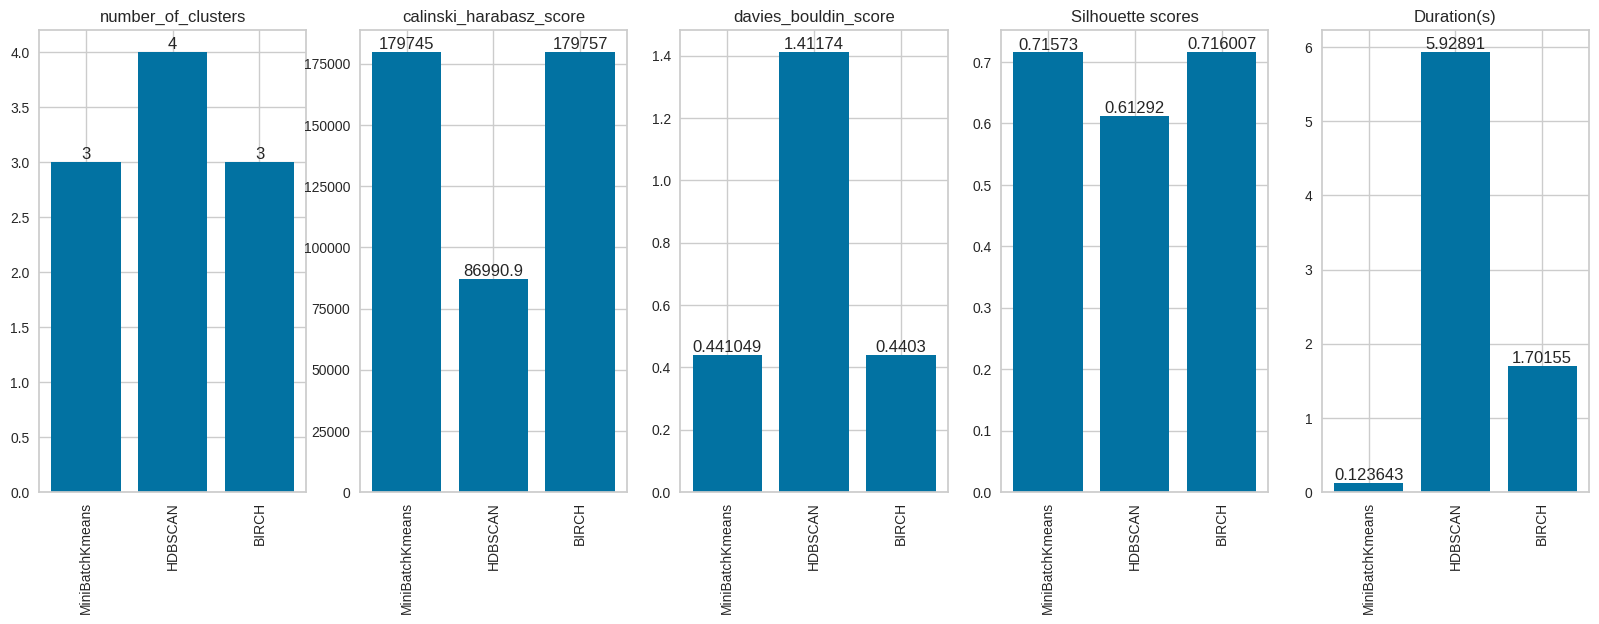

<Figure size 800x550 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(20,6))

#Visualization performance comparison
for i,col in enumerate(Evaluation.columns):
  bar_container = ax[i].bar(Evaluation.index,Evaluation[col])
  ax[i].set_xticklabels(Evaluation.index,rotation=90)
  ax[i].set_title(col)
  ax[i].bar_label(bar_container)

plt.show()
plt.tight_layout()

# Conclusion : Results, Finding and Recommendations

In [ ]:
Evaluation

number_of_clusters  calinski_harabasz_score  \
model                                                          
MiniBatchKmeans                   3            179745.438432   
HDBSCAN                           4             86990.940630   
BIRCH                             3            179756.765519   

                 davies_bouldin_score  Silhouette scores  Duration(s)  
model                                                                  
MiniBatchKmeans              0.441049           0.715730     0.123643  
HDBSCAN                      1.411736           0.612920     5.928909  
BIRCH                        0.440300           0.716007     1.701550

In a nutshell the 3 clusters formed by Mini Batch K-Means were found to be reasonably compact and well-separated. Next, BIRCH also identified 3 clusters, demonstrating high-quality clustering with dense and well-separated clusters. Last but not least, HDBSCAN identified 4 clusters with extra detected a significant number of outliers as another cluster.


In comparing the performance of the clustering algorithms, Mini Batch K-Means and BIRCH both identified a similar clustering structure with three main clusters and displayed high clustering quality, as evidenced by their high Calinski-Harabasz scores, low Davies-Bouldin scores and high Silhouette scores. These metrics indicate strong separation between clusters and tight within-cluster cohesion. Mini Batch K-Means distinguished itself with exceptional computational efficiency, completing the clustering in just 0.123643 seconds, making it the fastest among the three algorithms.In conclusion, Mini Batch K-Means emerged as the best model due to its balance of high clustering quality and superior computational efficiency.

Example

https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#DIMENSIONALITY-REDUCTION

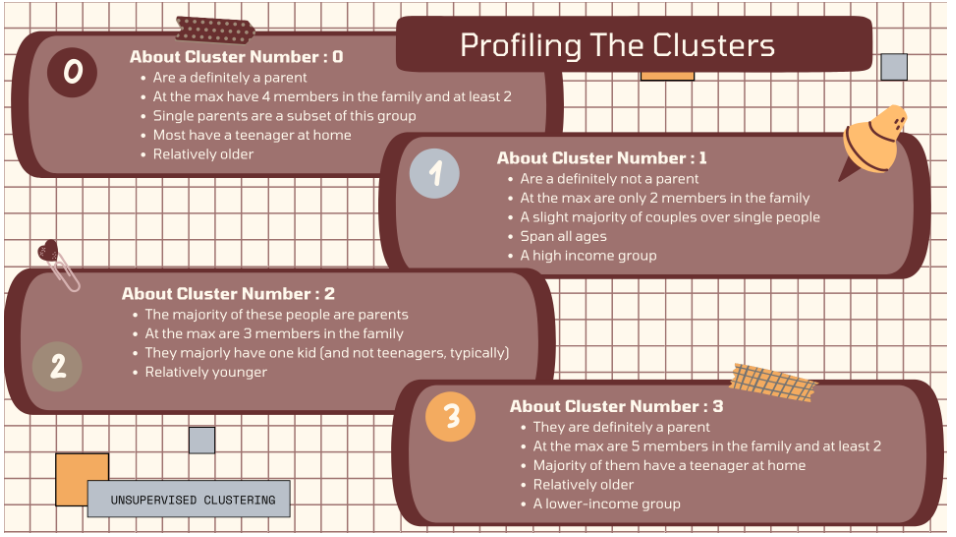